# Basin heat uptake

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram
import pandas as pd
import cosima_cookbook as cc
from collections import OrderedDict


In [2]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db')

In [3]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable = 'temp_global_ave'
darray_warm = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
darray_warm
annual_average_warm = darray_warm.groupby('time.year').mean(dim='time')
darray_swarm = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_swarm = darray_swarm.groupby('time.year').mean(dim='time')
temp_warm = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_warm = temp_warm.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_warm = cc.querying.getvar(expt,'net_sfc_heating',session)#.groupby('time.year').sum(dim='time')


In [4]:
surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session)
month_length = surface_heat_flux.time.dt.days_in_month
month_length

surface_heat_flux = surface_heat_flux.weighted(month_length)
hello = surface_heat_flux.groupby('time.year').mean('time')
hello

AttributeError: 'DataArrayWeighted' object has no attribute 'groupby'

In [5]:
cc.querying.getvar(expt,'net_sfc_heating',session)

,Array,Chunk
Bytes,311.04 MB,432.00 kB
Shape,"(720, 300, 360)","(1, 300, 360)"
Count,1446 Tasks,720 Chunks
Type,float32,numpy.ndarray


In [6]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session,start_time='2900-01-01')#.groupby('time.year').sum(dim='time')


In [7]:
surface_heat_flux_cont = surface_heat_flux_cont.sel(time = slice('2900-01-01','2950-01-01'))
surface_heat_flux_cont

,Array,Chunk
Bytes,259.20 MB,432.00 kB
Shape,"(600, 300, 360)","(1, 300, 360)"
Count,2046 Tasks,600 Chunks
Type,float32,numpy.ndarray


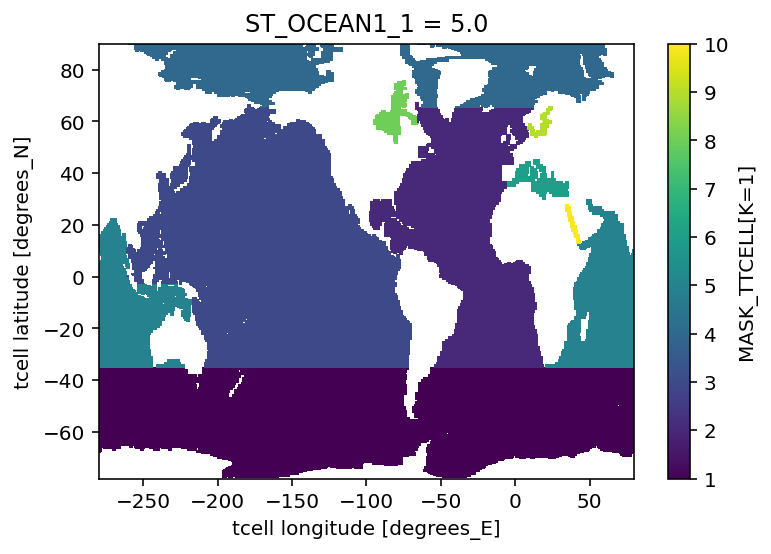

In [8]:
basinmask = xr.open_dataset('/scratch/e14/cy8964/access-om2/mask/basin_mask.nc')
basinmask.BASIN_MASK.plot()

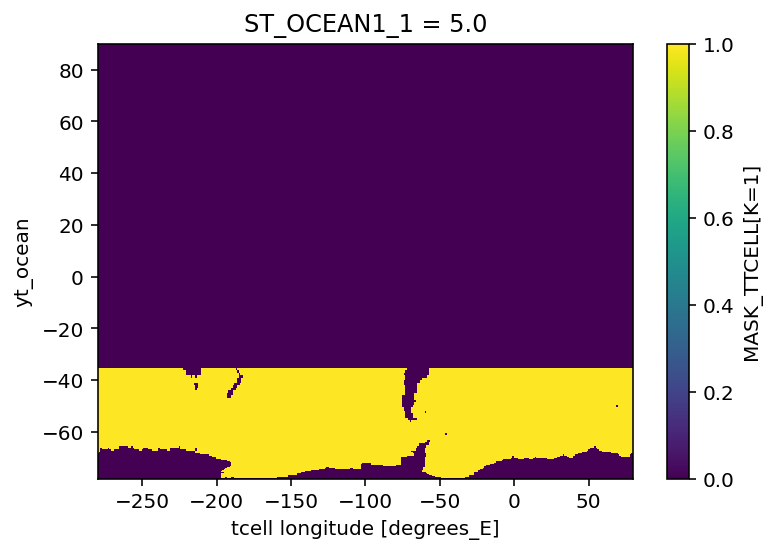

In [9]:
southern_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK < 2)).isel(ST_OCEAN1_1 = 0).fillna(0)
southern_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
southern_mask = southern_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
southern_mask.plot()

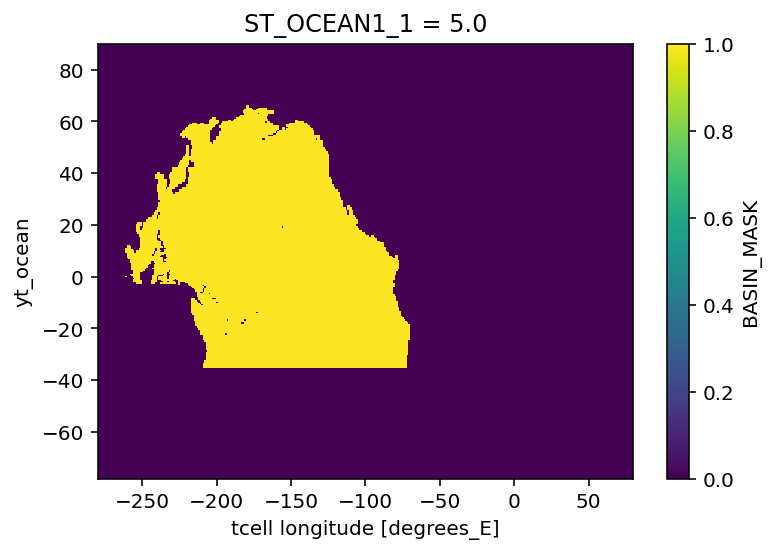

In [10]:
pacific_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 2).where(basinmask.BASIN_MASK < 4)/3).isel(ST_OCEAN1_1 = 0).fillna(0)
pacific_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
pacific_mask = pacific_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
pacific_mask.plot()

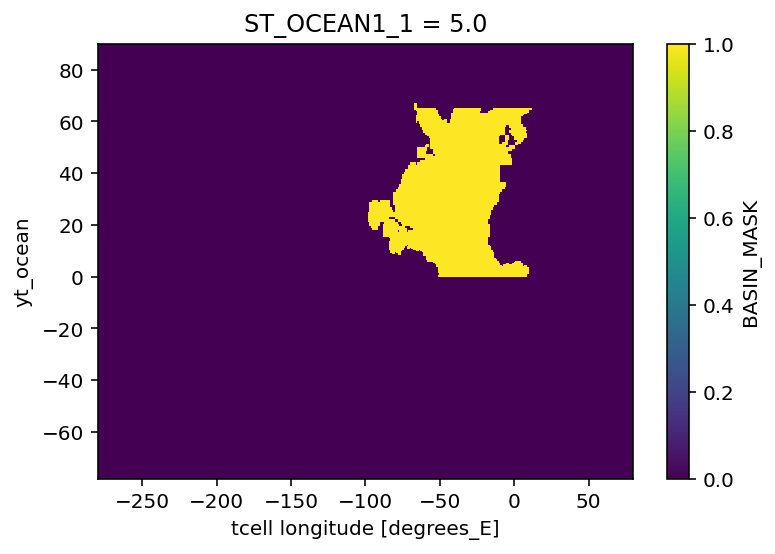

In [11]:
north_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN > 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
north_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
north_atlantic_mask = north_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
north_atlantic_mask.plot()

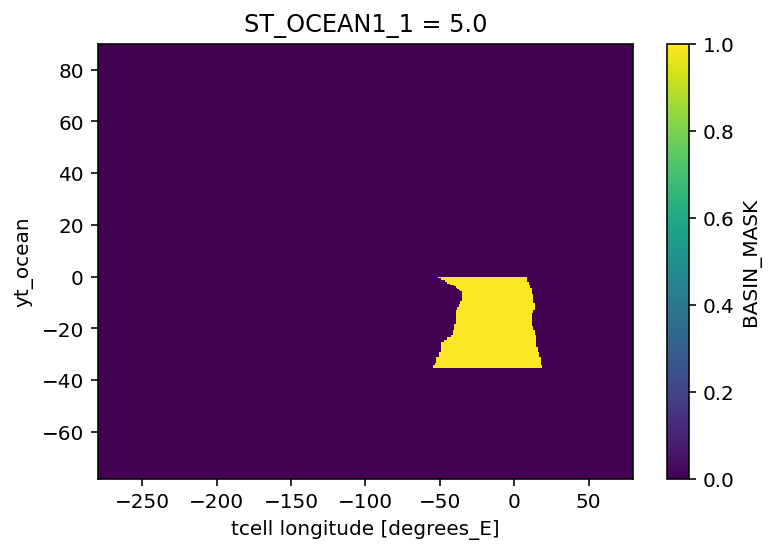

In [12]:
south_atlantic_mask = (basinmask.BASIN_MASK.where(basinmask.YT_OCEAN < 0).where(basinmask.BASIN_MASK > 1).where(basinmask.BASIN_MASK < 3)/2).isel(ST_OCEAN1_1 = 0).fillna(0)
south_atlantic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
south_atlantic_mask = south_atlantic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
south_atlantic_mask.plot()

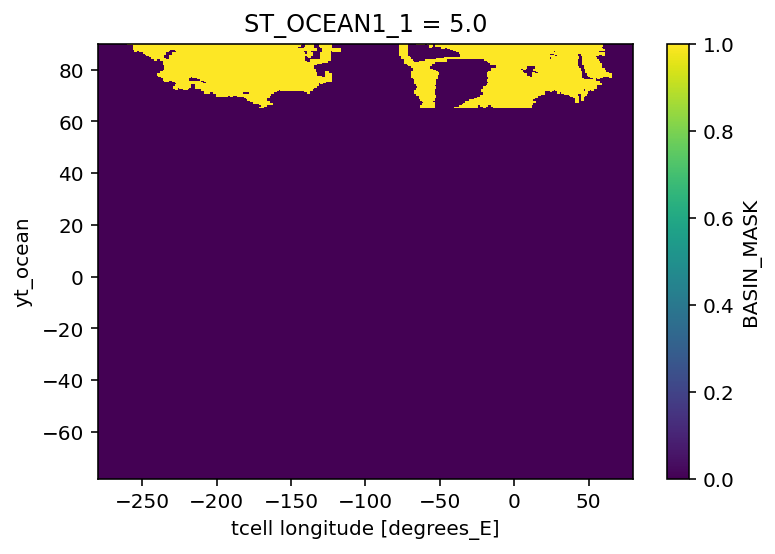

In [13]:
arctic_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 3).where(basinmask.BASIN_MASK < 5)/4).isel(ST_OCEAN1_1 = 0).fillna(0)
arctic_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
arctic_mask = arctic_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
arctic_mask.plot()

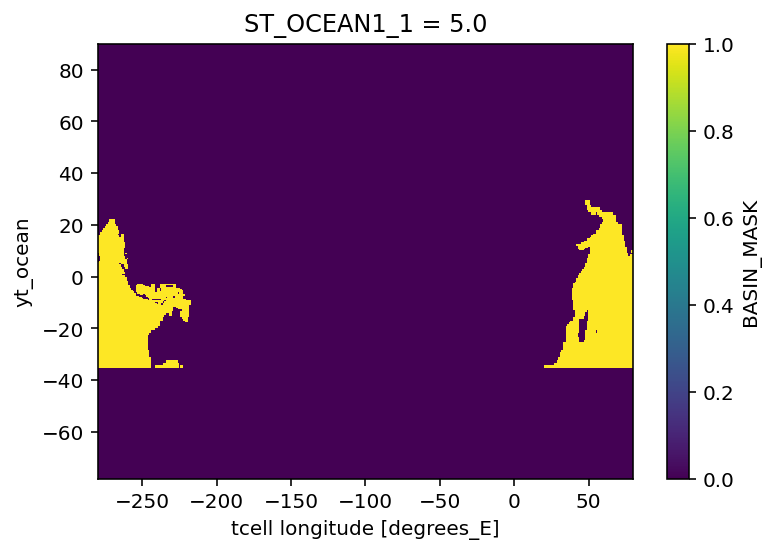

In [14]:
indian_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 4).where(basinmask.BASIN_MASK < 6)/5).isel(ST_OCEAN1_1 = 0).fillna(0)
indian_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
indian_mask = indian_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
indian_mask.plot()

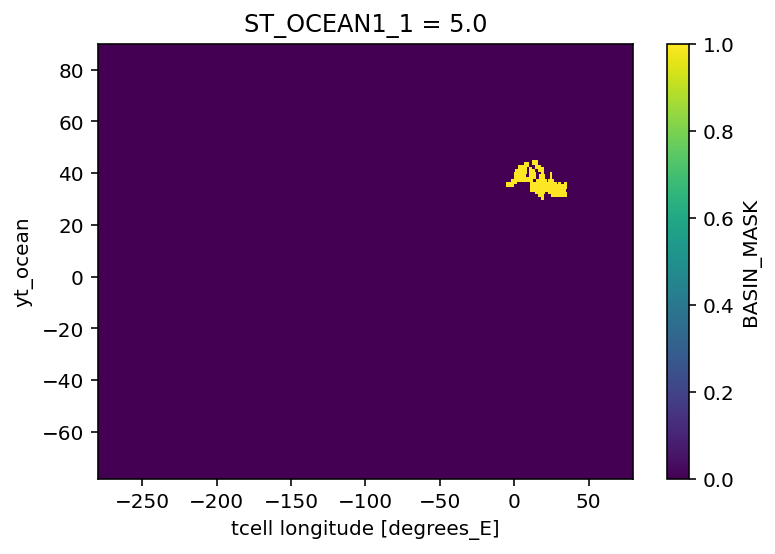

In [15]:
mediterranean_mask = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 5).where(basinmask.BASIN_MASK < 7)/6).isel(ST_OCEAN1_1 = 0).fillna(0)
mediterranean_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
mediterranean_mask = mediterranean_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
mediterranean_mask.plot()

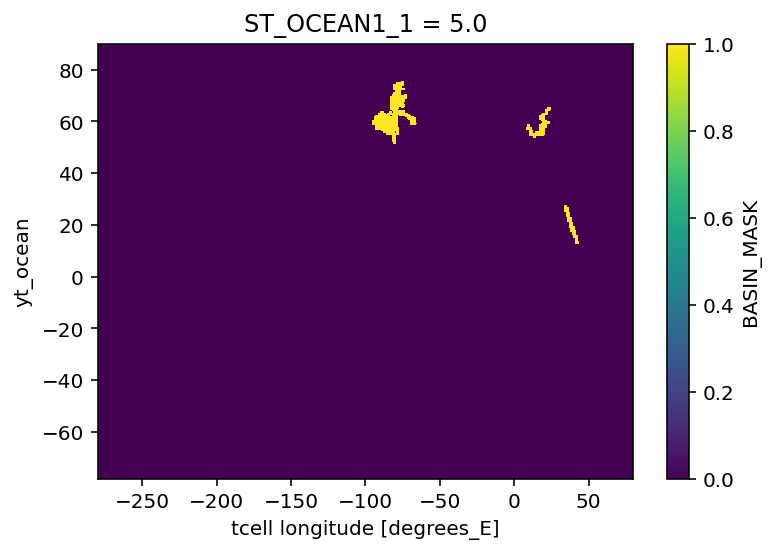

In [16]:
extra_mask1 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 7).where(basinmask.BASIN_MASK < 9)/8).isel(ST_OCEAN1_1 = 0).fillna(0)
extra_mask2 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 8).where(basinmask.BASIN_MASK < 10)/9).isel(ST_OCEAN1_1 = 0).fillna(0)
extra_mask3 = (basinmask.BASIN_MASK.where(basinmask.BASIN_MASK > 9)/10).isel(ST_OCEAN1_1 = 0).fillna(0)

extra_mask = extra_mask1+extra_mask2+extra_mask3
extra_mask.coords['YT_OCEAN'] = temp_warm.yt_ocean.values
extra_mask = extra_mask.rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
extra_mask.plot()

there are also some smaller masks e.g. baltic sea, hudson bay (canada) and red sea (middle east)

Note surface flux $$ Q = \frac{dq}{dt} - Z $$ where $Q$ is surface heat flux, $q$ is vertically integrated heat content, and $Z$ is horizontal flow of heat out of the region.
If we integrate surface flux over time then we get $$ \int_{t=0}^{t=50}Qdt = q(t=50)-q(t=0) - \int_{t=0}^{t=50}Zdt $$
Now we want to look at anomalies. So if we sum the surface flux anomaly over time we get the verticla heat anomaly at t=50 - vertical heat anomaly at t=0 and the difference is the total time integrated horizontal heat transport.
vertical heat anomaly at year = 0 is not zero bc average is in middle of year. but should be zero at time = 0

Surface flux

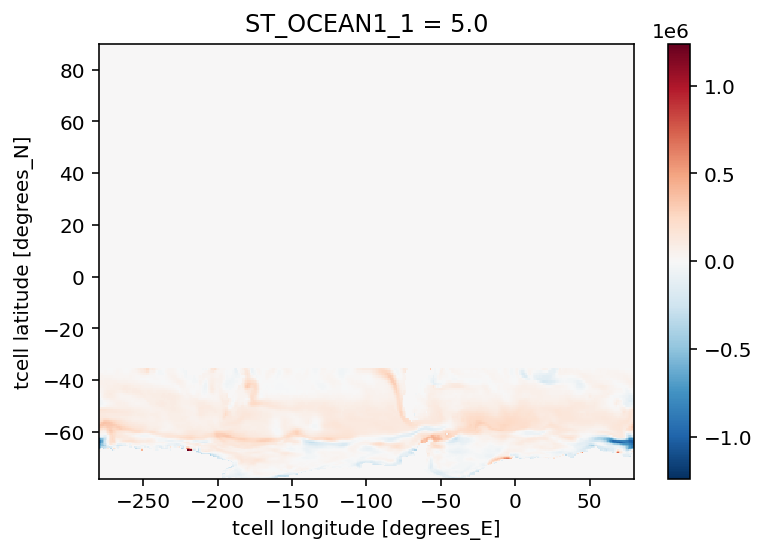

In [36]:
((surface_heat_flux_warm-surface_heat_flux_cont)*(month_length).sum('time')*southern_mask).plot()

In [38]:
((surface_heat_flux_warm-surface_heat_flux_cont*month_length*24*3600).sum('time')*southern_mask*darray3).sum('xt_ocean').sum('yt_ocean').values

array(5.95115161e+23)

Heat uptake

In [19]:
rho_0 = 1030#kg/m^3
c_p = 3992 #J/kg/K


In [20]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_warm = (rho_0*c_p*darray1*darray2).sum('st_ocean')


In [21]:
expt = '1deg_jra55_ryf_RCPcont'
variable1 = 'temp'
darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
variable2 = 'dzt'
darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)
vertically_integrated_heat_cont = (rho_0*c_p*darray1*darray2).sum('st_ocean')


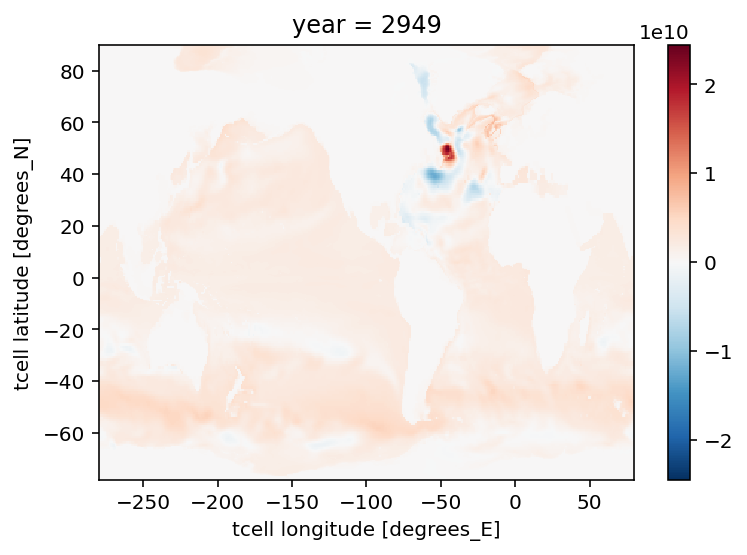

In [17]:
(vertically_integrated_heat_warm-vertically_integrated_heat_cont).groupby('time.year').mean('time').isel(year = 49).plot()

In [20]:
((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*southern_mask*darray3).groupby('time.year').mean('time').isel(year = 49).sum('xt_ocean').sum('yt_ocean').values

array(2.25707839e+23)

In [17]:
def heat_cont(ekey,basin_mask, year):
    rho_0 = 1030#kg/m^3
    c_p = 3992 
    expt = exptdict[ekey]['expt']
    variable1 = 'temp'
    darray1 = cc.querying.getvar(expt, variable1, session, ncfile = 'ocean.nc', start_time='2900-01-01')
    variable2 = 'dzt'
    darray2 = cc.querying.getvar(expt, variable2, session, ncfile = 'ocean.nc')
    variable3 = 'area_t'
    darray3 = cc.querying.getvar(expt, variable3, session,n=1)
    vertically_integrated_heat_warm = (rho_0*c_p*darray1*darray2).sum('st_ocean')
    
    basin_heat_content = ((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*basin_mask*darray3).groupby('time.year').mean('time').isel(year = year).sum('xt_ocean').sum('yt_ocean').values
    
    surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    month_length = surface_heat_flux.time.dt.days_in_month

    basin_surface_int = (((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return basin_heat_content, basin_surface_int

In [22]:
exptdict = OrderedDict([
    ('Control',  {'expt':'1deg_jra55_ryf_RCPcont'}),
    ('Warming',  {'expt':'1deg_jra55_ryf_RCPwarmhumid'}),
    ('Warming x2',  {'expt':'1deg_jra55_ryf_RCPwarmhumid2x'}),
    ('Cooling',  {'expt':'1deg_jra55_ryf_RCPcoolhumid'}),
    ('Cooling x2',  {'expt':'1deg_jra55_ryf_RCPcoolhumid2x'}),
    ('Warming w/o humidity',  {'expt':'1deg_jra55_ryf_rcpwarm'}),
    ('Cooling w/o humidity',  {'expt':'1deg_jra55_ryf_rcpcool'}),
    ('Cooling w/o humidity2', {'expt':'1deg_jra55_ryf_RCPcool'}),
    ('Windup', {'expt':'1deg_jra55_ryf_red3DSK_C9'})

])

In [23]:
basins = np.array([southern_mask, pacific_mask, indian_mask, north_atlantic_mask, south_atlantic_mask, arctic_mask, mediterranean_mask])

In [153]:
basin_heat_content, basin_surface_int = heat_cont('Warming', southern_mask, 49)
print(basin_heat_content)
print(basin_surface_int)

2.2570783942972134e+23
4.455841434340915e+23


In [25]:
basin_heat_content, basin_surface_int = heat_cont('Warming', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', extra_mask, 49)
extra = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])



In [155]:
southern

array([ 2.25707839e+23,  4.45584143e+23, -2.19876304e+23])

In [156]:
surface_heat_flux_cont

,Array,Chunk
Bytes,259.20 MB,432.00 kB
Shape,"(600, 300, 360)","(1, 300, 360)"
Count,2046 Tasks,600 Chunks
Type,float32,numpy.ndarray


In [27]:
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))

In [28]:
data

array([[ 2.25707839e+23,  2.38478297e+23,  6.25781575e+22,
         3.69656566e+22,  4.29141401e+22,  9.84244452e+21,
         4.14492815e+21,  3.44446885e+20],
       [ 4.45584143e+23,  1.47075883e+23,  5.38935951e+22,
         2.41827570e+22,  3.06448640e+21, -5.51424658e+22,
         3.16671577e+21,  1.29324592e+21],
       [-2.19876304e+23,  9.14024146e+22,  8.68456237e+21,
         1.27828996e+22,  3.98496537e+22,  6.49849103e+22,
         9.78212384e+20, -9.48799030e+20]])

Text(0.5, 1.0, 'Heat anomalies in basins after 50 years, warming perturbation')

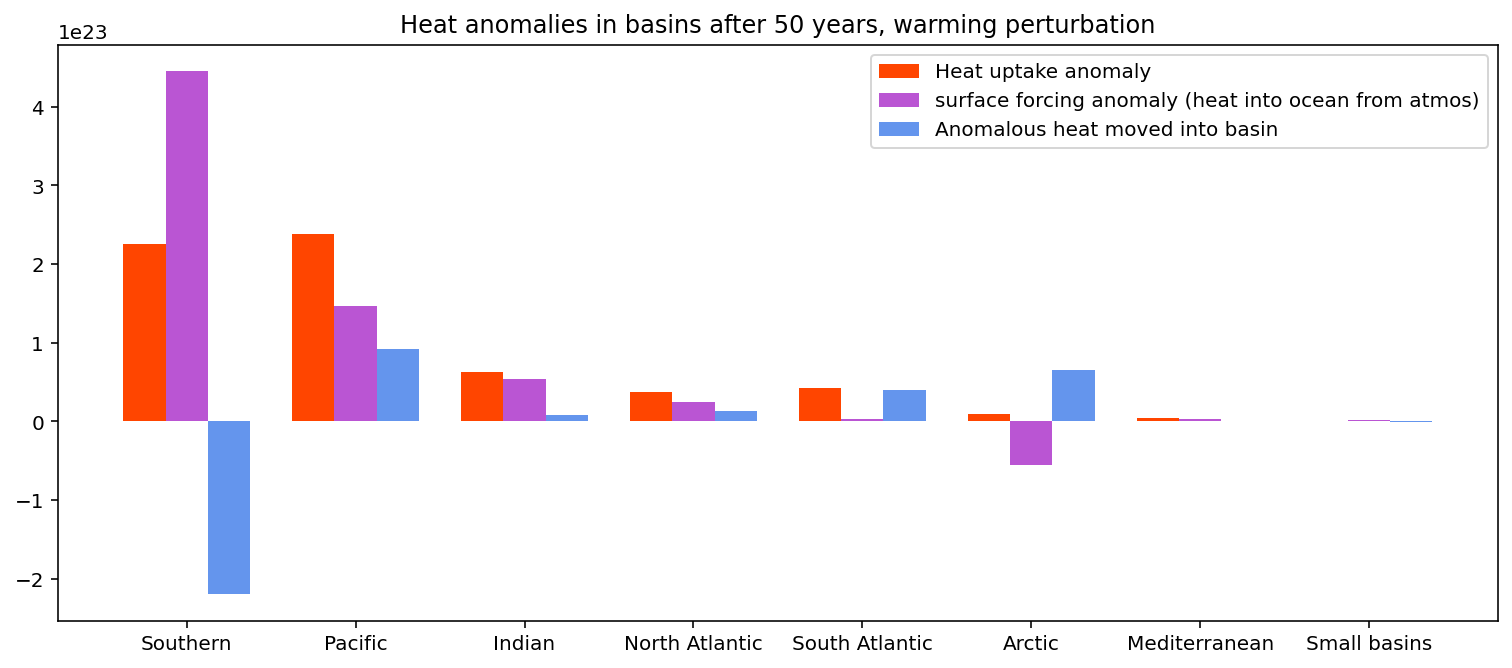

In [33]:
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X+0.25, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Small basins'))
plt.title('Heat anomalies in basins after 50 years, warming perturbation')

In [30]:
np.sum(data, axis = 1)

array([ 6.20975910e+23,  6.23118360e+23, -2.14245007e+21])

^^^ total heat content is approximately equal to total surface forcing. it's not exactly equal because i didnt include a couple of basins.


In [164]:
((vertically_integrated_heat_warm-vertically_integrated_heat_cont)*darray3).groupby('time.year').mean('time').isel(year = 49).sum('xt_ocean').sum('yt_ocean').values

array(6.21039257e+23)

In [170]:
expt = '1deg_jra55_ryf_RCPwarmhumid'

In [171]:
surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
month_length = surface_heat_flux.time.dt.days_in_month

In [172]:
variable3 = 'area_t'
darray3 = cc.querying.getvar(expt, variable3, session,n=1)

In [173]:
(((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*darray3).sum('xt_ocean').sum('yt_ocean').values


array(6.22357569e+23)

indeed heat content is roughly equal to surface flux. surface flux is slightly bigger, maybe due to heat input into melting ice???

In [24]:
basin_heat_content, basin_surface_int = heat_cont('Cooling', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))

[-6.24211766e+23 -6.16343259e+23 -7.86850689e+21]


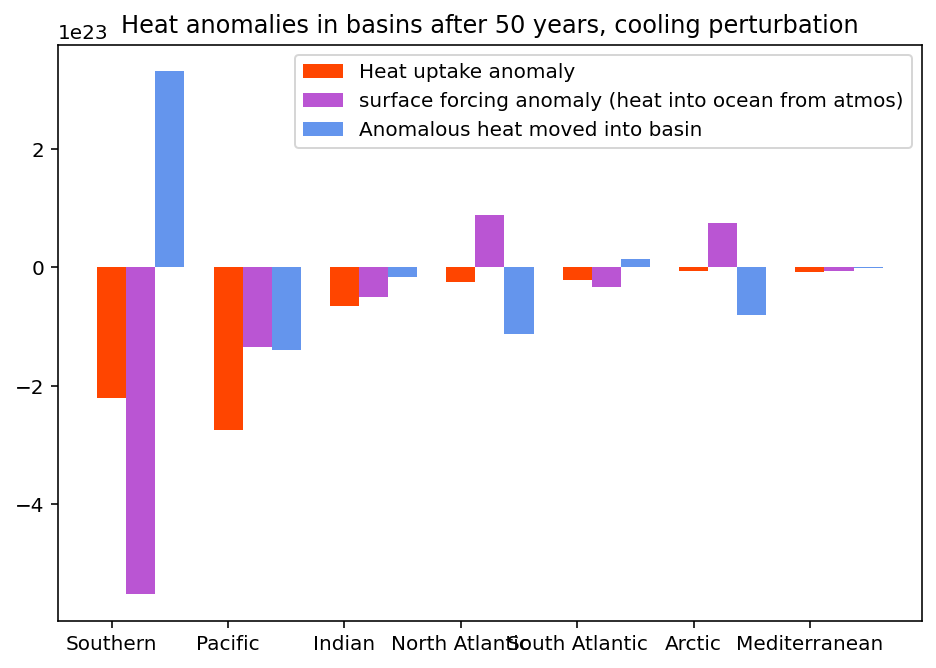

In [25]:
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, cooling perturbation')
print(np.sum(data, axis = 1))
plt.savefig('cooling_heatbasinanom')

[ 6.20631463e+23  6.21825114e+23 -1.19365104e+21]


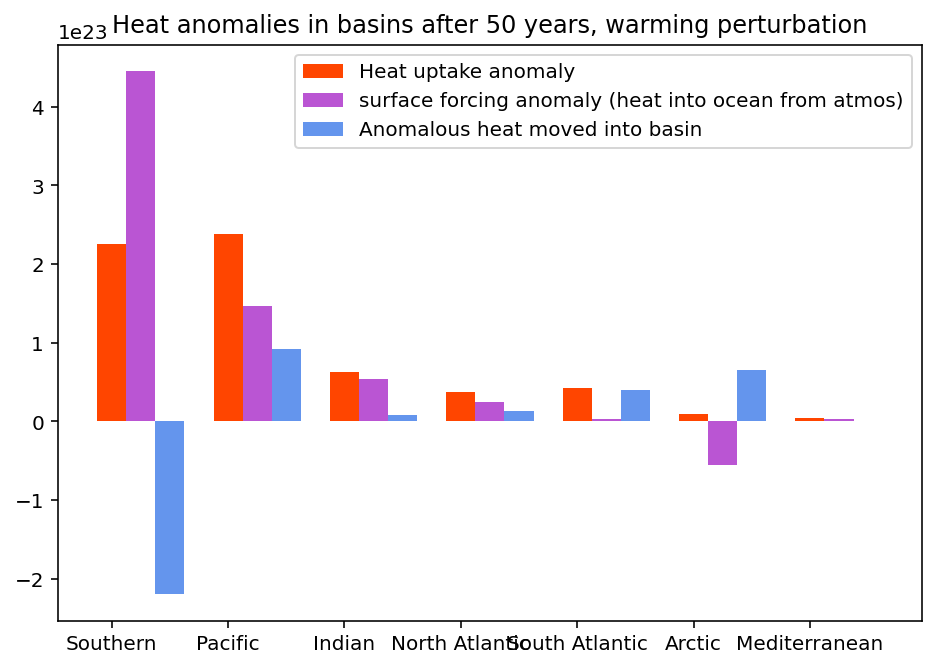

In [26]:
basin_heat_content, basin_surface_int = heat_cont('Warming', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, warming perturbation')
print(np.sum(data, axis = 1))
plt.savefig('warming_heatbasinanom')

[-1.36746834e+24 -1.35385401e+24 -1.36143253e+22]


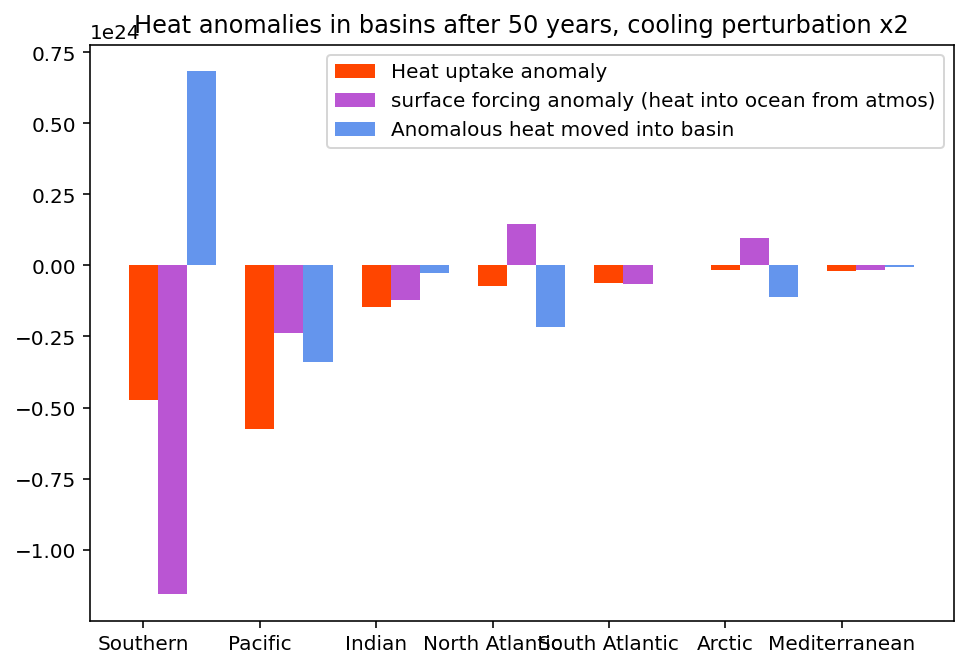

In [193]:
basin_heat_content, basin_surface_int = heat_cont('Cooling x2', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Cooling x2', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, cooling perturbation x2')
print(np.sum(data, axis = 1))

[ 1.22577727e+24  1.23389712e+24 -8.11985241e+21]


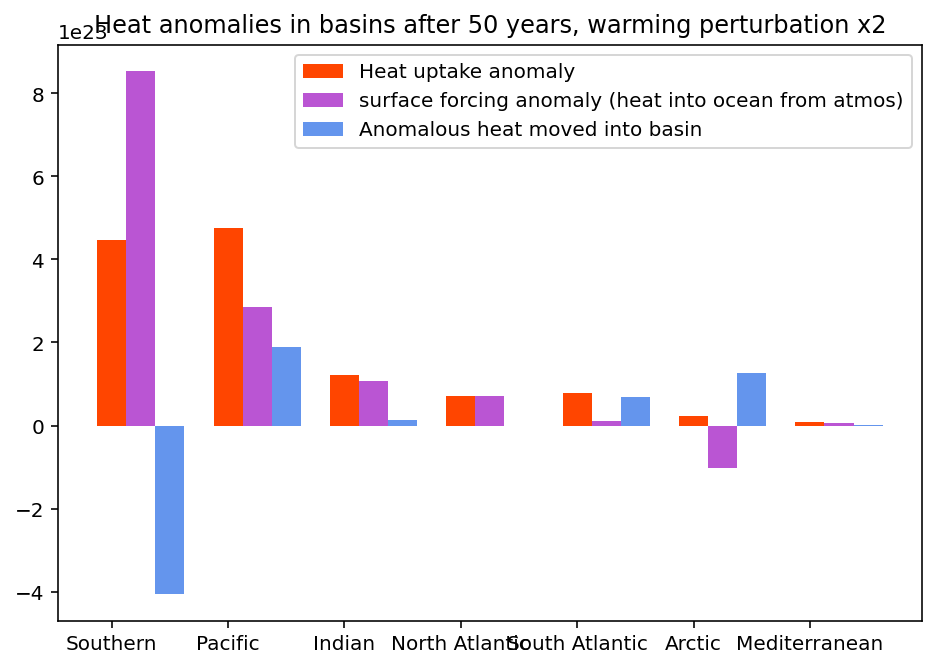

In [194]:
basin_heat_content, basin_surface_int = heat_cont('Warming x2', southern_mask, 49)
southern = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', pacific_mask, 49)
pacific = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', indian_mask, 49)
indian = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', north_atlantic_mask, 49)
north_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', south_atlantic_mask, 49)
south_atlantic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', arctic_mask, 49)
arctic = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

basin_heat_content, basin_surface_int = heat_cont('Warming x2', mediterranean_mask, 49)
mediterranean = np.array([basin_heat_content, basin_surface_int, -basin_surface_int+basin_heat_content])

data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean))
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'mediumorchid', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'cornflowerblue', width = 0.25)
ax.legend(labels=['Heat uptake anomaly', 'surface forcing anomaly (heat into ocean from atmos)','Anomalous heat moved into basin'])
plt.xticks(X, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean'))
plt.title('Heat anomalies in basins after 50 years, warming perturbation x2')
print(np.sum(data, axis = 1))

In [27]:
expt = '1deg_jra55_ryf_RCPcont'

sw_cont = cc.querying.getvar(expt, 'swflx', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
lw_cont = cc.querying.getvar(expt, 'lw_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
sens_cont = cc.querying.getvar(expt, 'sens_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
evap_cont = cc.querying.getvar(expt, 'evap_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))


In [28]:
def decompose_surface_flux(ekey,basin_mask, year):
    expt = exptdict[ekey]['expt']

    darray3 = cc.querying.getvar(expt, 'area_t', session,n=1)

    sw = cc.querying.getvar(expt, 'swflx', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    lw = cc.querying.getvar(expt, 'lw_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    sens = cc.querying.getvar(expt, 'sens_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    evap = cc.querying.getvar(expt, 'evap_heat', session, ncfile = 'ocean_month.nc', start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    month_length = surface_heat_flux.time.dt.days_in_month

    basin_sw_int = (((sw-sw_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_lw_int = (((lw-lw_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_sens_int = (((sens-sens_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_evap_int = (((evap-evap_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    basin_surface_int = (((surface_heat_flux-surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return np.array([basin_sw_int, basin_lw_int, basin_sens_int, basin_evap_int, basin_surface_int])

In [29]:
def decompose_surface_flux_cont(basin_mask, year):
    expt = '1deg_jra55_ryf_RCPcont'

    darray3 = cc.querying.getvar(expt, 'area_t', session,n=1)
    surface_heat_flux = cc.querying.getvar(expt,'net_sfc_heating',session, start_time='2900-01-01').sel(time = slice('2900-01-01','2950-01-01'))
    month_length = surface_heat_flux.time.dt.days_in_month

    basin_sw_int = (((sw_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_lw_int = (((lw_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_sens_int = (((sens_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    basin_evap_int = (((evap_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    basin_surface_int = (((surface_heat_flux_cont)*month_length*24*3600).sel(time = slice('2900-01-01',str(2901+year)+'-01-01')).sum('time')*basin_mask*darray3).sum('xt_ocean').sum('yt_ocean').values
    
    return np.array([basin_sw_int, basin_lw_int, basin_sens_int, basin_evap_int, basin_surface_int])

In [30]:
southern = decompose_surface_flux('Warming', southern_mask, 59)
pacific = decompose_surface_flux('Warming', pacific_mask, 59)
indian = decompose_surface_flux('Warming', indian_mask, 59)
north_atlantic = decompose_surface_flux('Warming', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Warming', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Warming', arctic_mask, 59)
mediterranean = decompose_surface_flux('Warming', mediterranean_mask, 59)
extra = decompose_surface_flux('Warming', extra_mask, 59)

In [31]:
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))

[ 3.28142974e+23  1.63952825e+23  8.88345667e+23 -7.92636603e+23
  6.46553621e+23]


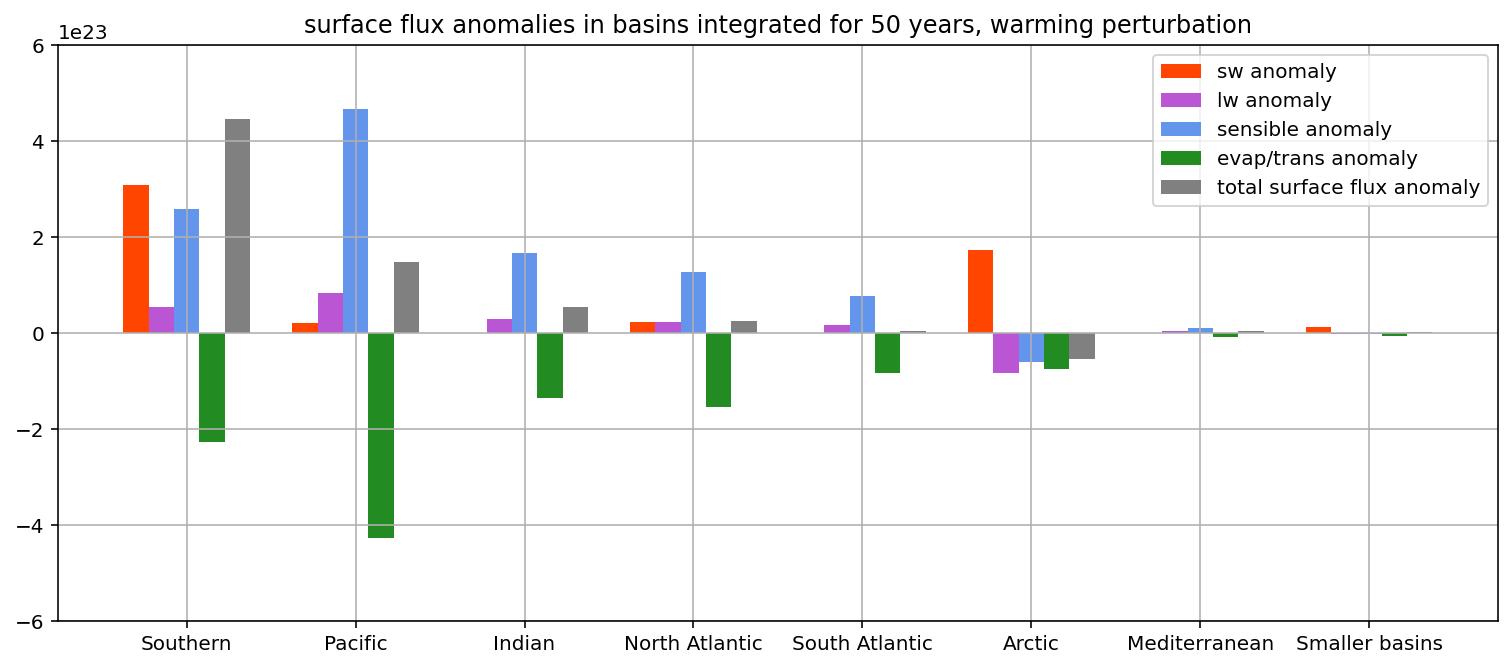

In [33]:
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.15)
ax.bar(X + 0.15, data[1], color = 'mediumorchid', width = 0.15)
ax.bar(X + 0.3, data[2], color = 'cornflowerblue', width = 0.15)
ax.bar(X + 0.45, data[3], color = 'forestgreen', width = 0.15)
ax.bar(X + 0.60, data[4], color = 'grey', width = 0.15)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('surface flux anomalies in basins integrated for 50 years, warming perturbation')
plt.grid()
plt.ylim(-6e23,6e23)
print(np.sum(data[:,0:3], axis = 1))
plt.savefig('warming_surfbasin')

In [34]:
southern = decompose_surface_flux('Cooling', southern_mask, 59)
pacific = decompose_surface_flux('Cooling', pacific_mask, 59)
indian = decompose_surface_flux('Cooling', indian_mask, 59)
north_atlantic = decompose_surface_flux('Cooling', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Cooling', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Cooling', arctic_mask, 59)
mediterranean = decompose_surface_flux('Cooling', mediterranean_mask, 59)
extra = decompose_surface_flux('Cooling', extra_mask, 59)

In [35]:
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))

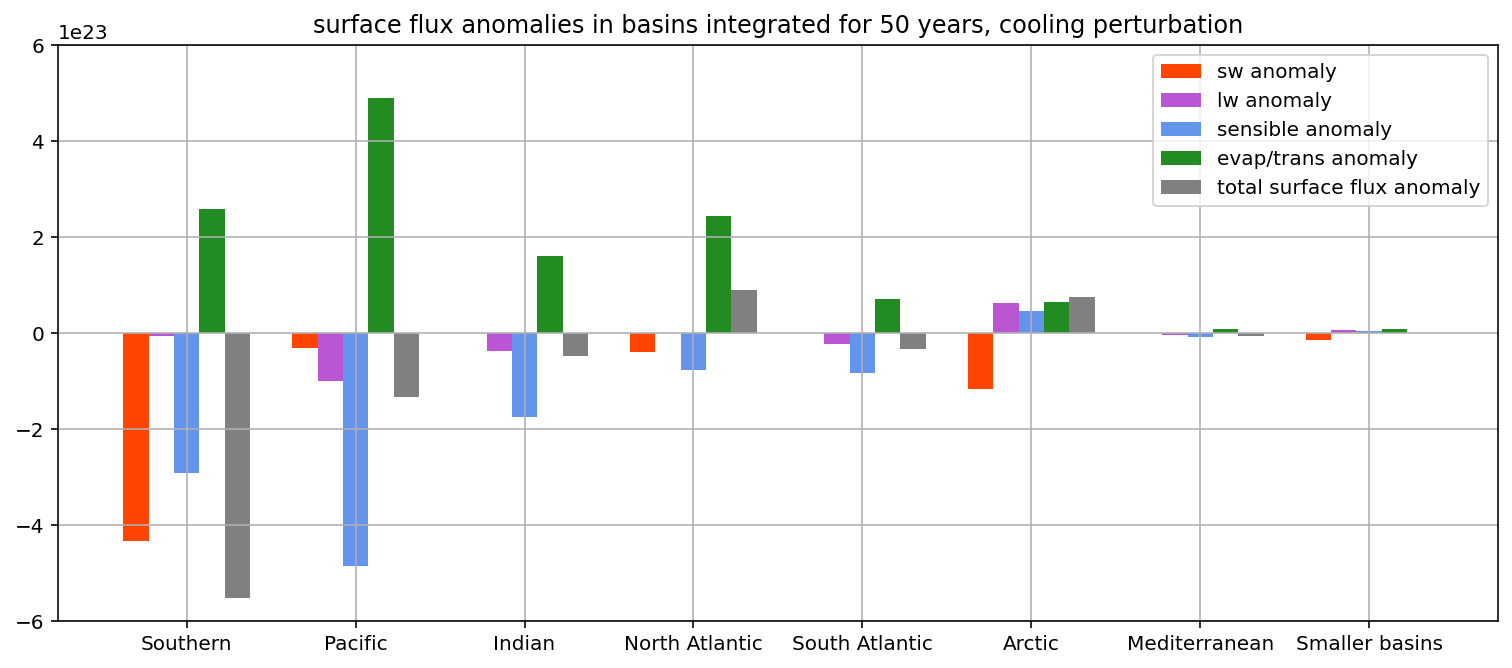

In [36]:
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.15)
ax.bar(X + 0.15, data[1], color = 'mediumorchid', width = 0.15)
ax.bar(X + 0.3, data[2], color = 'cornflowerblue', width = 0.15)
ax.bar(X + 0.45, data[3], color = 'forestgreen', width = 0.15)
ax.bar(X + 0.60, data[4], color = 'grey', width = 0.15)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('surface flux anomalies in basins integrated for 50 years, cooling perturbation')
plt.grid()
plt.ylim(-6e23,6e23)
#print(np.sum(data[0:3], axis = 1))
plt.savefig('cooling_surfbasin')

(-6e+23, 6e+23)

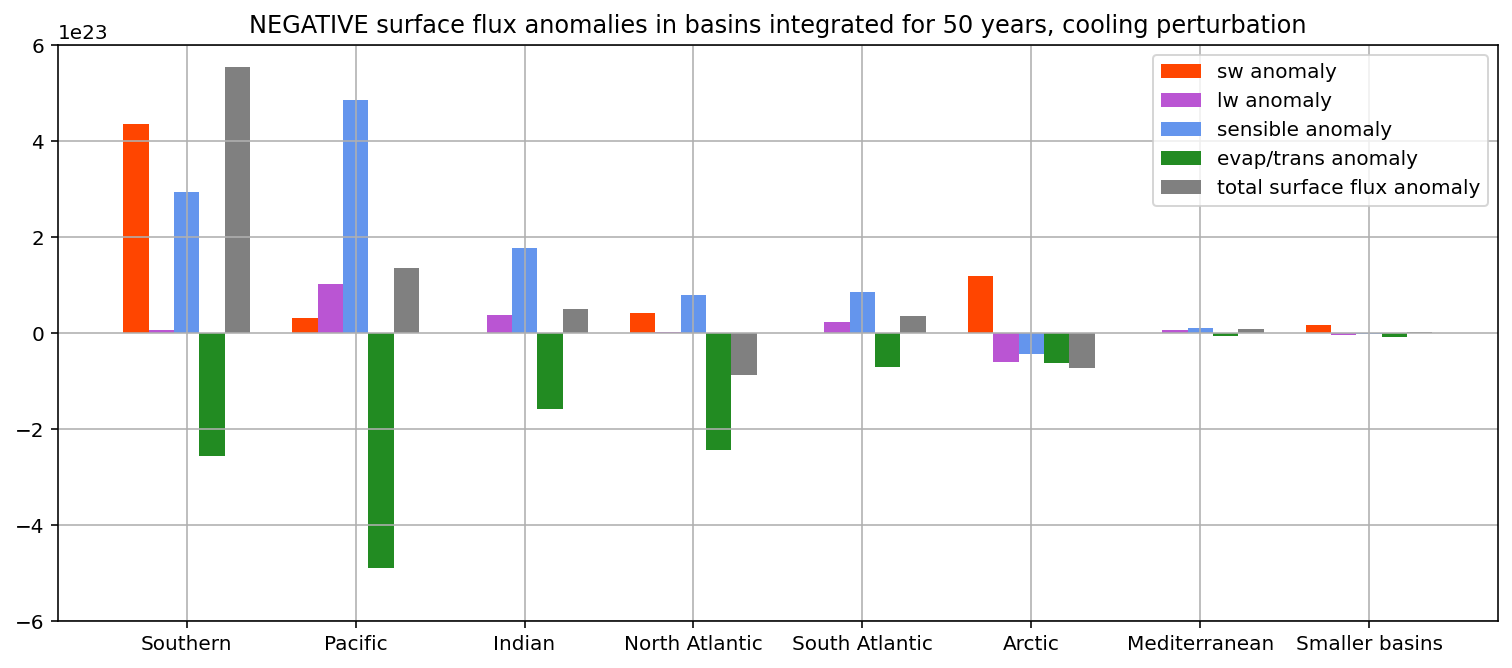

In [53]:
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, -data[0], color = 'orangered', width = 0.15)
ax.bar(X + 0.15, -data[1], color = 'mediumorchid', width = 0.15)
ax.bar(X + 0.3, -data[2], color = 'cornflowerblue', width = 0.15)
ax.bar(X + 0.45, -data[3], color = 'forestgreen', width = 0.15)
ax.bar(X + 0.60, -data[4], color = 'grey', width = 0.15)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('NEGATIVE surface flux anomalies in basins integrated for 50 years, cooling perturbation')
plt.grid()
plt.ylim(-6e23,6e23)
#print(np.sum(data[0:3], axis = 1))

It appears that the sw anomaly is assymetric, as is the latent flux. sw anomalies are only found where ice extent is, so that indicates the change in short wave radiation reaching the ocean is different for the warming and cooling cases. 

What about brine rejection or freshening, I guess this is not included in the heat flux anomaly, but it is a surface forcing to be considered.



But what is the constant value?

Text(0.5, 1.0, 'surface flux anomalies in basins integrated for 50 years, cooling x2 perturbation')

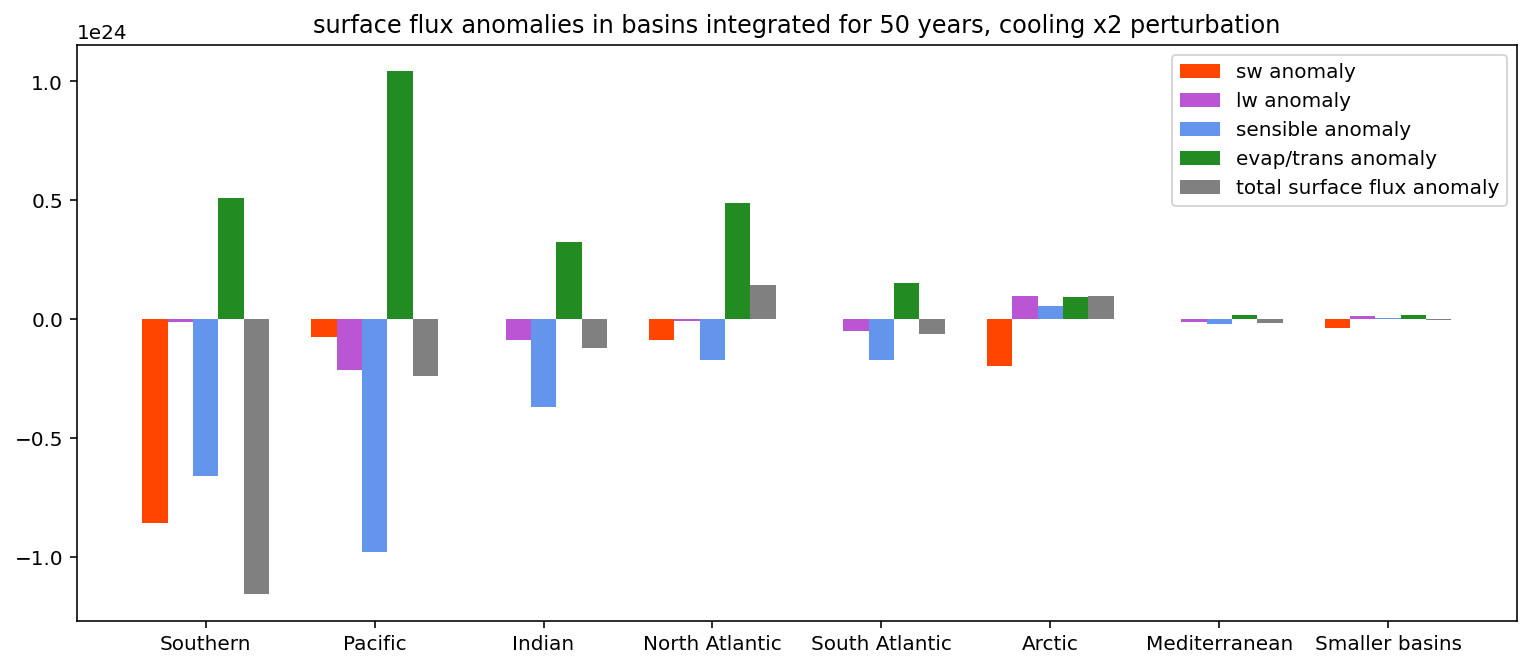

In [96]:
southern = decompose_surface_flux('Cooling x2', southern_mask, 59)
pacific = decompose_surface_flux('Cooling x2', pacific_mask, 59)
indian = decompose_surface_flux('Cooling x2', indian_mask, 59)
north_atlantic = decompose_surface_flux('Cooling x2', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Cooling x2', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Cooling x2', arctic_mask, 59)
mediterranean = decompose_surface_flux('Cooling x2', mediterranean_mask, 59)
extra = decompose_surface_flux('Cooling x2', extra_mask, 59)
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.15)
ax.bar(X + 0.15, data[1], color = 'mediumorchid', width = 0.15)
ax.bar(X + 0.3, data[2], color = 'cornflowerblue', width = 0.15)
ax.bar(X + 0.45, data[3], color = 'forestgreen', width = 0.15)
ax.bar(X + 0.60, data[4], color = 'grey', width = 0.15)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('surface flux anomalies in basins integrated for 50 years, cooling x2 perturbation')
#print(np.sum(data[0:3], axis = 1))

Text(0.5, 1.0, 'surface flux anomalies in basins integrated for 50 years, warming x2 perturbation')

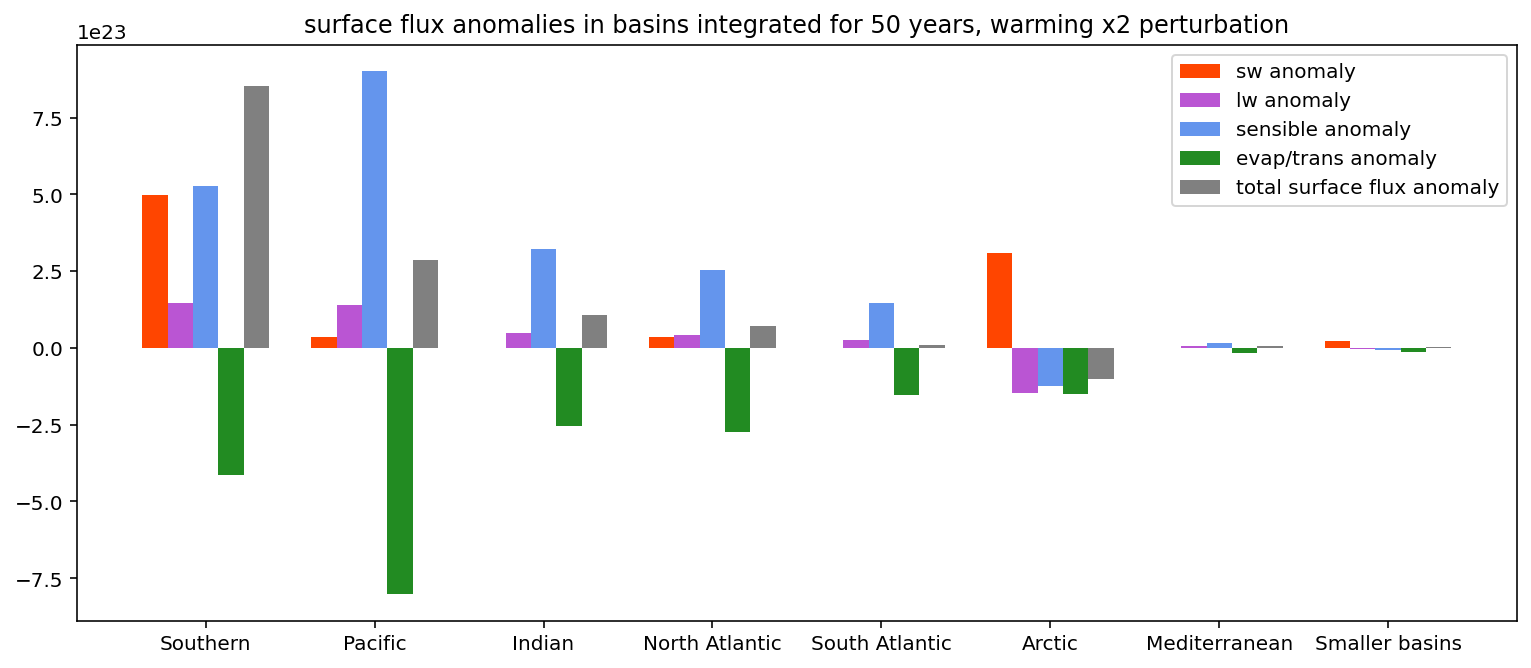

In [97]:
southern = decompose_surface_flux('Warming x2', southern_mask, 59)
pacific = decompose_surface_flux('Warming x2', pacific_mask, 59)
indian = decompose_surface_flux('Warming x2', indian_mask, 59)
north_atlantic = decompose_surface_flux('Warming x2', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Warming x2', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Warming x2', arctic_mask, 59)
mediterranean = decompose_surface_flux('Warming x2', mediterranean_mask, 59)
extra = decompose_surface_flux('Warming x2', extra_mask, 59)
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.15)
ax.bar(X + 0.15, data[1], color = 'mediumorchid', width = 0.15)
ax.bar(X + 0.3, data[2], color = 'cornflowerblue', width = 0.15)
ax.bar(X + 0.45, data[3], color = 'forestgreen', width = 0.15)
ax.bar(X + 0.60, data[4], color = 'grey', width = 0.15)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('surface flux anomalies in basins integrated for 50 years, warming x2 perturbation')
#print(np.sum(data[0:3], axis = 1))

In [82]:
southern = decompose_surface_flux('Warming w/o humidity', southern_mask, 59)
pacific = decompose_surface_flux('Warming w/o humidity', pacific_mask, 59)
indian = decompose_surface_flux('Warming w/o humidity', indian_mask, 59)
north_atlantic = decompose_surface_flux('Warming w/o humidity', north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux('Warming w/o humidity', south_atlantic_mask, 59)
arctic = decompose_surface_flux('Warming w/o humidity', arctic_mask, 59)
mediterranean = decompose_surface_flux('Warming w/o humidity', mediterranean_mask, 59)
extra = decompose_surface_flux('Warming w/o humidity', extra_mask, 59)
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.15)
ax.bar(X + 0.15, data[1], color = 'mediumorchid', width = 0.15)
ax.bar(X + 0.3, data[2], color = 'cornflowerblue', width = 0.15)
ax.bar(X + 0.45, data[3], color = 'forestgreen', width = 0.15)
ax.bar(X + 0.60, data[4], color = 'grey', width = 0.15)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('surface flux anomalies in basins integrated for 50 years, warming w/o humidity change perturbation')
#print(np.sum(data[0:3], axis = 1))

VariableNotFoundError: No files were found containing 'swflx' in the '1deg_jra55_ryf_rcpwarm' experiment

In [48]:
southern = decompose_surface_flux_cont( southern_mask, 59)
pacific = decompose_surface_flux_cont( pacific_mask, 59)
indian = decompose_surface_flux_cont(indian_mask, 59)
north_atlantic = decompose_surface_flux_cont( north_atlantic_mask, 59)
south_atlantic = decompose_surface_flux_cont(south_atlantic_mask, 59)
arctic = decompose_surface_flux_cont(arctic_mask, 59)
mediterranean = decompose_surface_flux_cont( mediterranean_mask, 59)
extra = decompose_surface_flux_cont( extra_mask, 59)


In [49]:
data = np.column_stack((southern,pacific, indian, north_atlantic, south_atlantic, arctic, mediterranean, extra))

Text(0.5, 1.0, 'control surface flux total in basins integrated for 50 years')

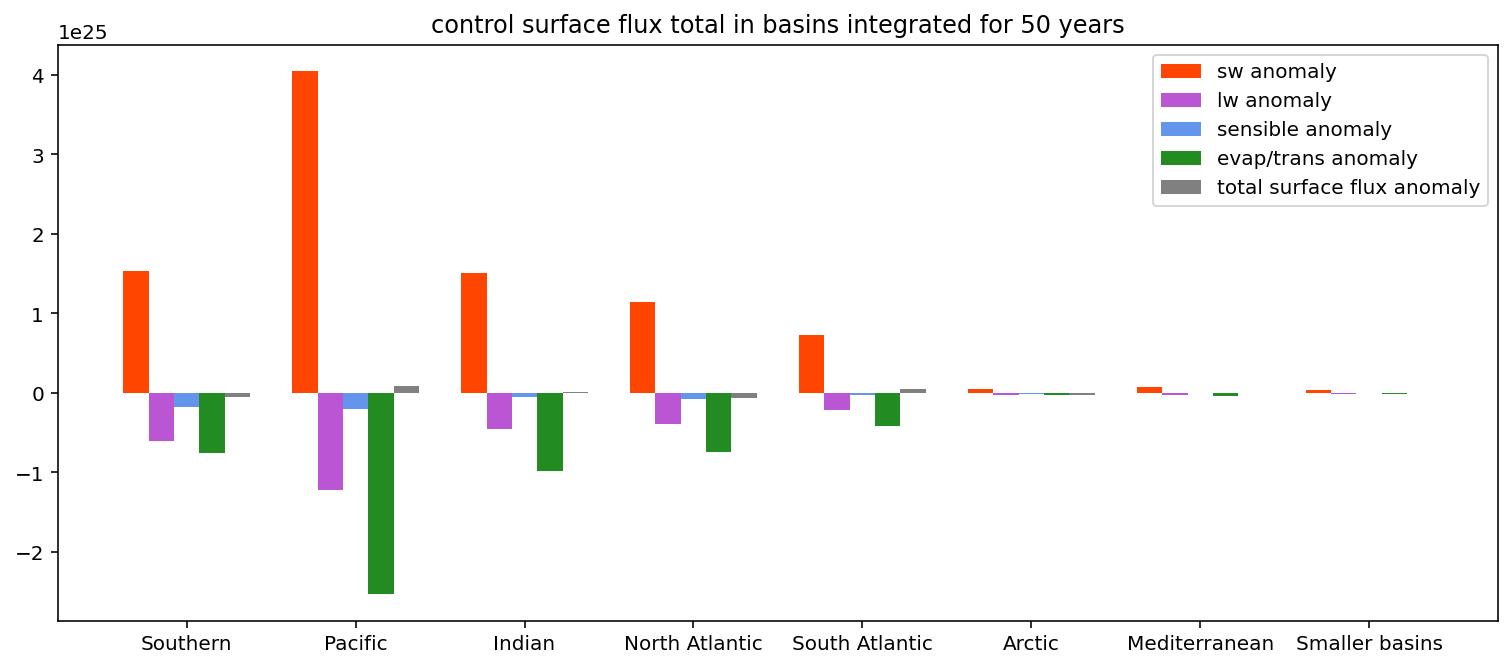

In [51]:
X = np.arange(8)
fig = plt.figure(figsize = (10,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'orangered', width = 0.15)
ax.bar(X + 0.15, data[1], color = 'mediumorchid', width = 0.15)
ax.bar(X + 0.3, data[2], color = 'cornflowerblue', width = 0.15)
ax.bar(X + 0.45, data[3], color = 'forestgreen', width = 0.15)
ax.bar(X + 0.60, data[4], color = 'grey', width = 0.15)

ax.legend(labels=['sw anomaly', 'lw anomaly','sensible anomaly', 'evap/trans anomaly','total surface flux anomaly'])
plt.xticks(X+0.3, ('Southern', 'Pacific', 'Indian', 'North Atlantic', 'South Atlantic','Arctic','Mediterranean', 'Smaller basins'))
plt.title('control surface flux total in basins integrated for 50 years')


why might the surface flux be different in the cooling vs warming? ice melt/freezing may be not symmetric. check sst symmetries relative to freezing point, and amount of melt/freezing:

In [72]:
expt = '1deg_jra55_ryf_RCPwarmhumid'
melt_warm = cc.querying.getvar(expt, 'melt', session, ncfile = 'ocean_month.nc', start_time = '2900-01-01')
expt = '1deg_jra55_ryf_RCPcoolhumid'
melt_cool = cc.querying.getvar(expt, 'melt', session, ncfile = 'ocean_month.nc', start_time = '2900-01-01')
expt = '1deg_jra55_ryf_RCPcont'
melt_cont = cc.querying.getvar(expt, 'melt', session, ncfile = 'ocean_month.nc', start_time = '2900-01-01')


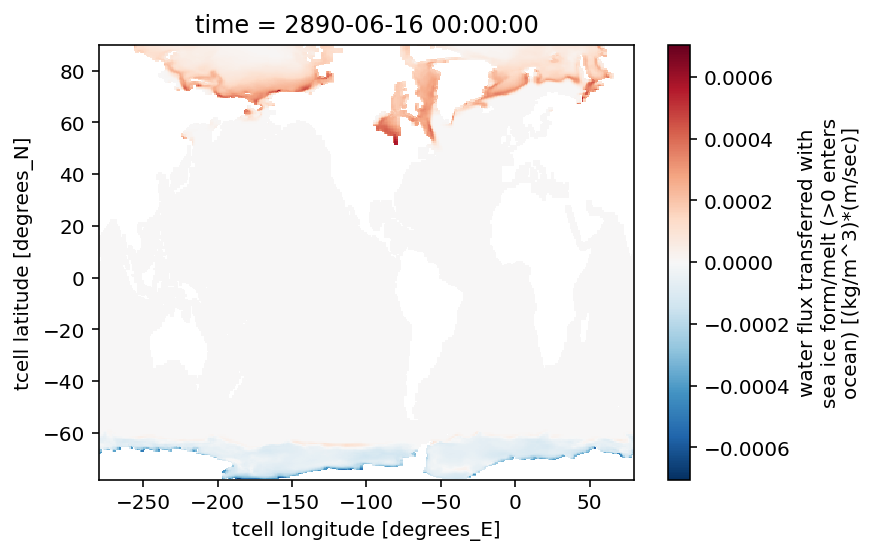

In [73]:
melt_cont.isel(time = 5).plot()

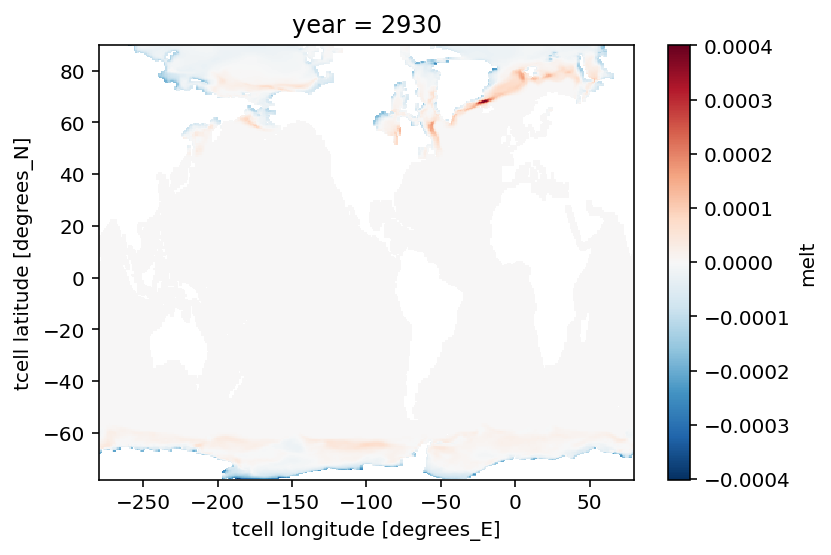

In [76]:
(melt_cont).groupby('time.year').mean('time').isel(year = 40).plot()

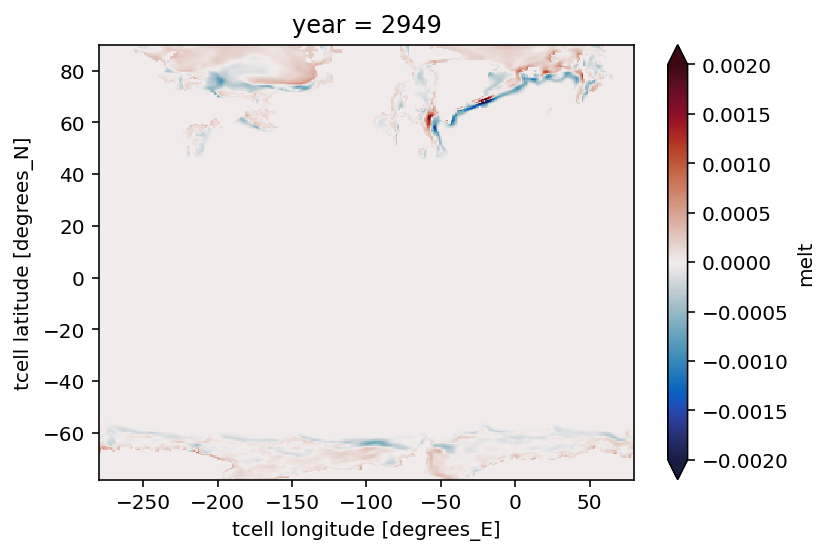

In [94]:
(melt_warm-melt_cont).groupby('time.year').sum('time').isel(year = 59).plot(cmap = cm.cm.balance, vmin = -0.002, vmax = 0.002)

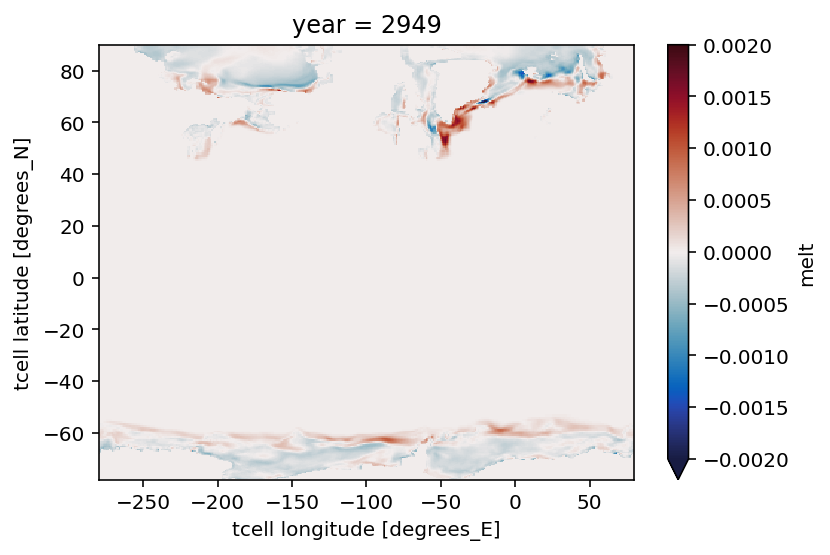

In [95]:
(melt_cool-melt_cont).groupby('time.year').sum('time').isel(year = 59).plot(cmap = cm.cm.balance, vmin = -0.002, vmax = 0.002)

negative values in each run means freezing, so negative in the anomaly means more freezing and red means more melting

in cooling experiment... more freezing closer to antarctica, more melting further out. I guess more ice being formed, so when it is wind driven northwards there is more to melt??

for first year, the melting signal is much less strong, maybe because the melting of icebergs comes after their increased formation with some sort of travel time delay.

cooling has stronger anomalies in southern ocean.



# are asymmetric changes in ice cover the reason????

In [37]:
from dask.distributed import Client
from datetime import timedelta

client = Client()
client



Client Scheduler: tcp://127.0.0.1:34951 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [38]:
expt = '1deg_jra55_ryf_RCPcont'

var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)

In [39]:
var['time'] = var.time - timedelta(hours=12)

In [40]:
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t

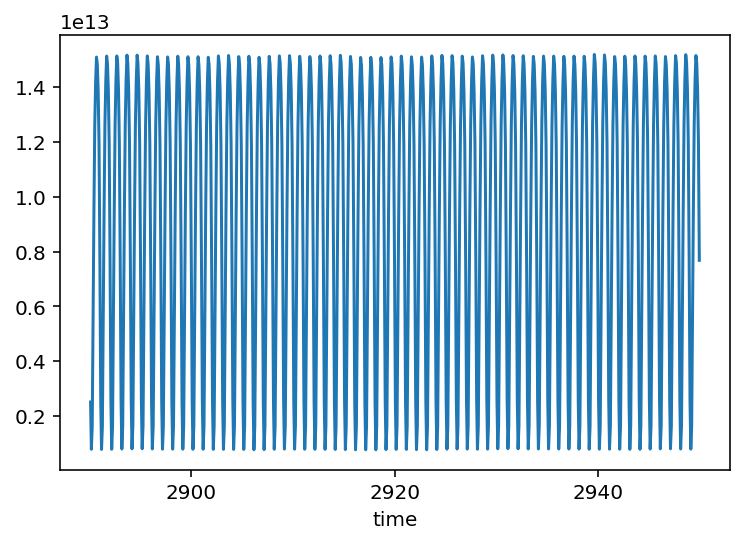

In [41]:
area_zonalsum = area.sum('xt_ocean')
SH_area = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
NH_area = area_zonalsum.sel(yt_ocean=slice(0, 90)).sum('yt_ocean').load()
SH_area.plot()

In [42]:
expt = '1deg_jra55_ryf_RCPwarmhumid'

var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)
var['time'] = var.time - timedelta(hours=12)
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t
area_zonalsum = area.sum('xt_ocean')
SH_area_warm = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
NH_area_warm = area_zonalsum.sel(yt_ocean=slice(0, 90)).sum('yt_ocean').load()


In [43]:
expt = '1deg_jra55_ryf_RCPcoolhumid'

var = cc.querying.getvar(expt, 'aice_m', session, decode_coords=False)
var['time'] = var.time - timedelta(hours=12)
area_t = cc.querying.getvar(expt, 'area_t',session,n=1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t
area_zonalsum = area.sum('xt_ocean')
SH_area_cool = area_zonalsum.sel(yt_ocean=slice(-90, -45)).sum('yt_ocean').load()
NH_area_cool = area_zonalsum.sel(yt_ocean=slice(0, 90)).sum('yt_ocean').load()


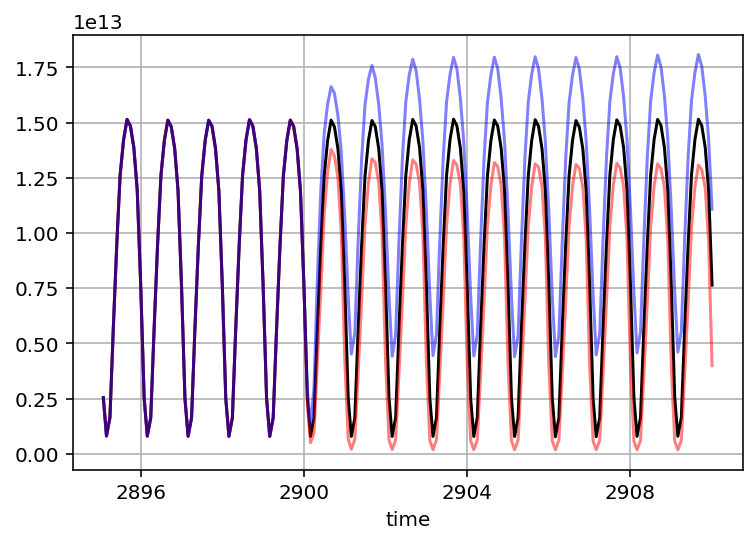

In [44]:
fig=plt.figure()
SH_area.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'k')
SH_area_warm.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'r', alpha = 0.5)
SH_area_cool.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'b', alpha = 0.5)
plt.grid()

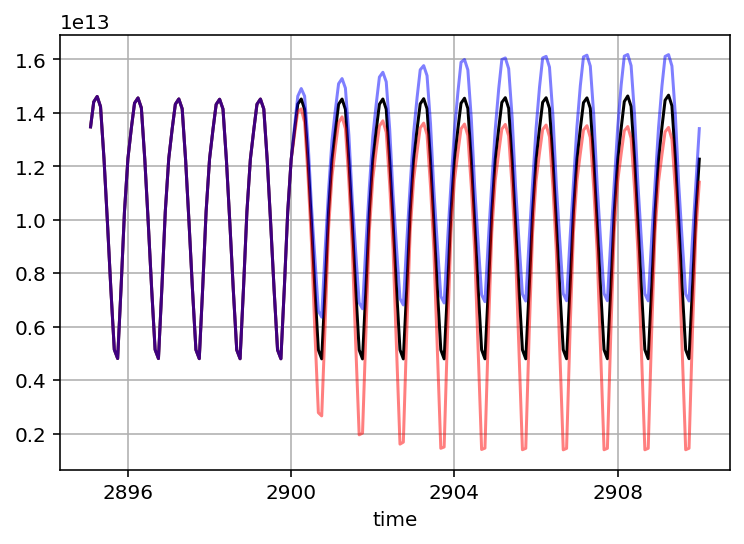

In [45]:
fig=plt.figure()
NH_area.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'k')
NH_area_warm.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'r', alpha = 0.5)
NH_area_cool.sel(time = slice('2895-01-01','2910-01-01')).plot(color = 'b', alpha = 0.5)
plt.grid()

^^ nearly all the ice melts in summer

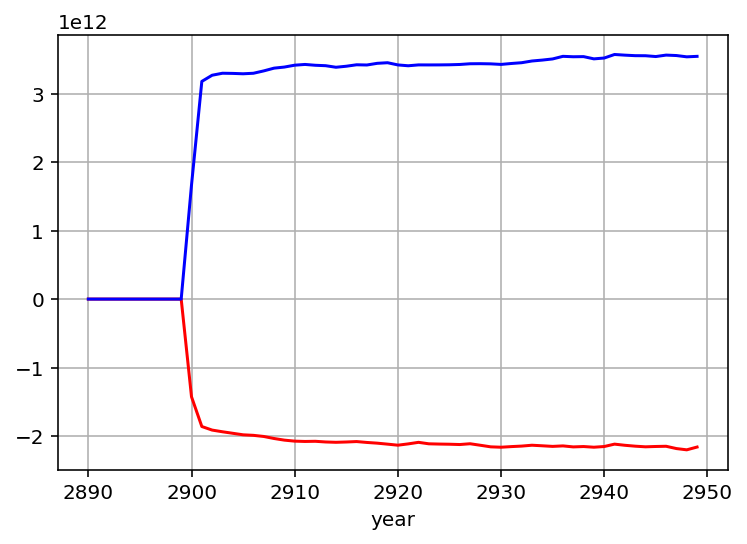

In [46]:
fig=plt.figure()
(SH_area_warm-SH_area).groupby('time.year').mean('time').plot(color = 'r')
#(SH_area_warm-SH_area).plot(color = 'r', alpha = 0.5)
(SH_area_cool-SH_area).groupby('time.year').mean('time').plot(color = 'b')
#(SH_area_cool-SH_area).plot(color = 'b',alpha = 0.5)
plt.grid()
plt.savefig('southernice')

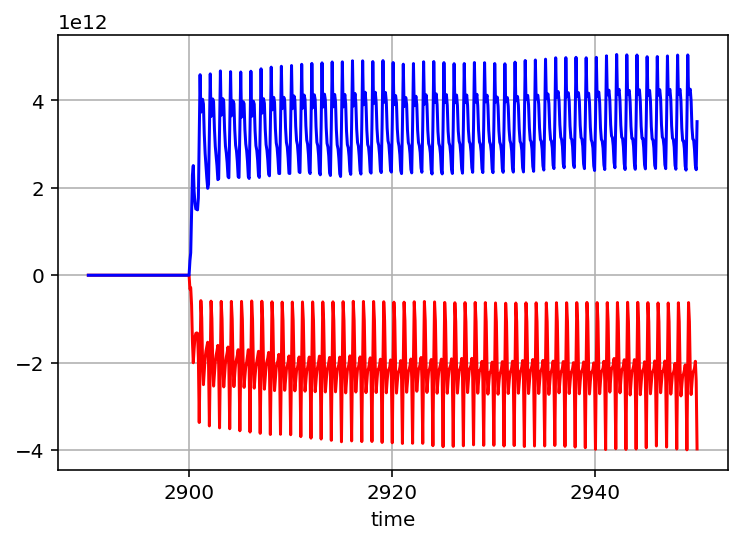

In [76]:
fig=plt.figure()
#(SH_area_warm-SH_area).groupby('time.year').mean('time').plot(color = 'r')
(SH_area_warm-SH_area).plot(color = 'r')
#(SH_area_cool-SH_area).groupby('time.year').mean('time').plot(color = 'b')
(SH_area_cool-SH_area).plot(color = 'b')
plt.grid()

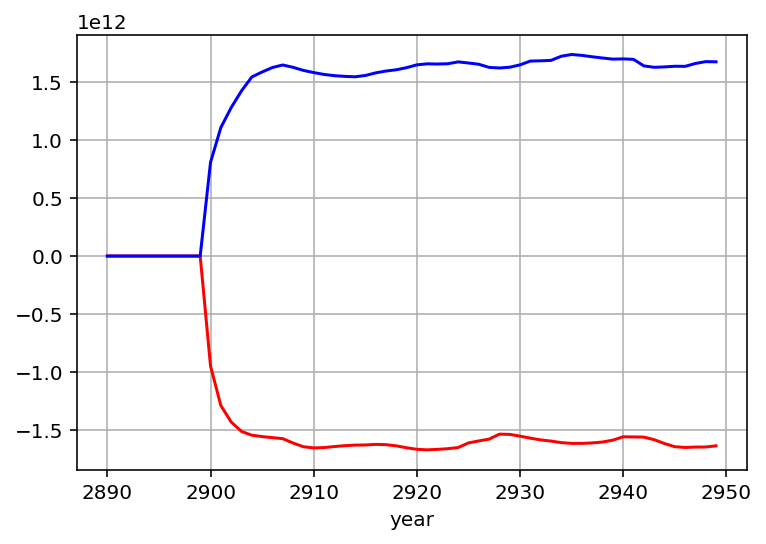

In [64]:
fig=plt.figure()
(NH_area_warm-NH_area).groupby('time.year').mean('time').plot(color = 'r')
#(NH_area_warm-NH_area).plot(color = 'r', alpha = 0.5)
(NH_area_cool-NH_area).groupby('time.year').mean('time').plot(color = 'b')
#(NH_area_cool-NH_area).plot(color = 'b',alpha = 0.5)
plt.grid()

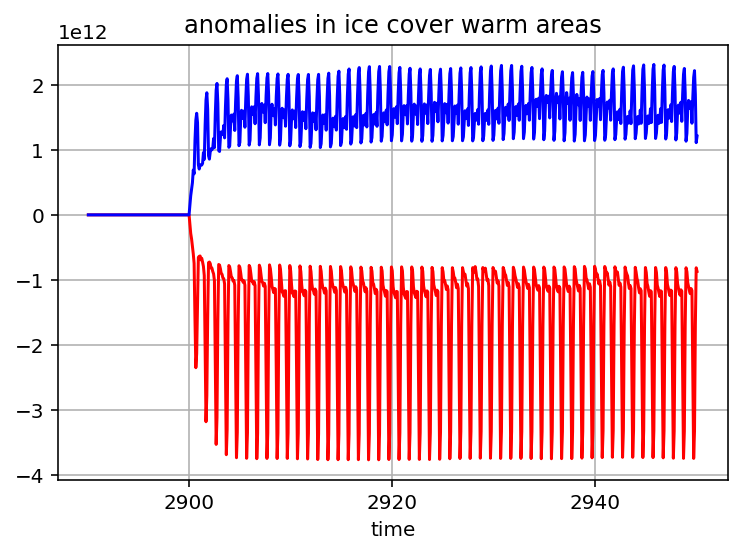

In [47]:
fig=plt.figure()
#(NH_area_warm-NH_area).groupby('time.year').mean('time').plot(color = 'r')
(NH_area_warm-NH_area).plot(color = 'r')
#(NH_area_cool-NH_area).groupby('time.year').mean('time').plot(color = 'b')
(NH_area_cool-NH_area).plot(color = 'b')
plt.grid()
plt.title('anomalies in ice cover warm areas')
plt.savefig('northernice')

can see a much larger summer ice cover anomaly in the warming case. this means a lot of the ice melts in summer. more ice has melted in winter, but the difference isn't as big.

Text(0.5, 1.0, 'anomalies in ice cover area')

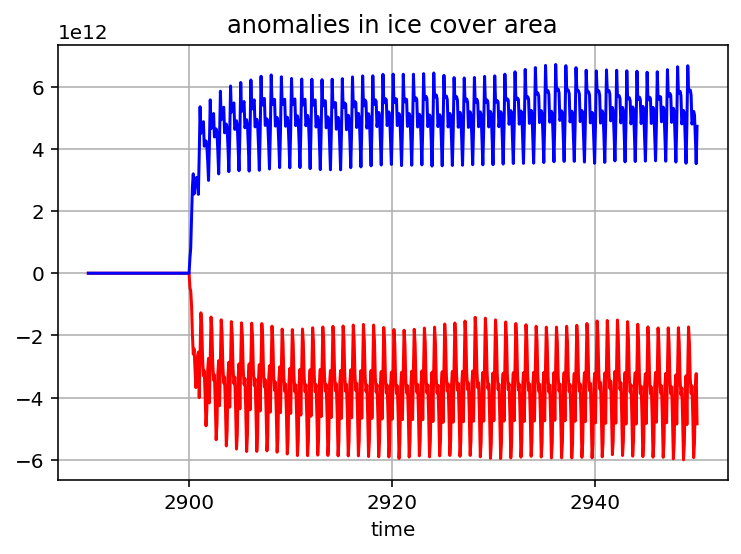

In [81]:
fig=plt.figure()
#(NH_area_warm-NH_area).groupby('time.year').mean('time').plot(color = 'r')
(NH_area_warm+SH_area_warm-NH_area-SH_area).plot(color = 'r')
#(NH_area_cool-NH_area).groupby('time.year').mean('time').plot(color = 'b')
(NH_area_cool+SH_area_cool-NH_area-SH_area).plot(color = 'b')
plt.grid()
plt.title('anomalies in ice cover area')

the anomaly in ice cover for the southern hemisphere is about 1.5 times as large for the cooling perturbation compared to the warming

for the northern hemisphere the anomalies are a similar magnitude hence I guess why the anomaly in sw is a similar magnitude

if you add them you get a diannual cycle. cooling mean is a larger magnitude due to southern ocean. NH has only slightly more mean sea ice area.